In [22]:
import pandas as pd
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_line, theme, element_text


## Exercícios a serem realizados:
LC2.5, LC2.6, LC2.8, LC2.13, LC2.14, LC2.18, LC2.20, LC2.22, LC2.27, LC3.30, LC3.31,
LC3.36.

In [23]:
df_alaska = pd.read_csv('datasets/alaska_flights.csv')
df_weather = pd.read_csv('datasets/early_january_weather.csv')

In [24]:
df_alaska.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,724.0,725,-1.0,1020.0,1030,-10.0,AS,11,N594AS,EWR,SEA,338.0,2402,7,25,2013-01-01 07:00:00
1,2,2013,1,1,1808.0,1815,-7.0,2111.0,2130,-19.0,AS,7,N553AS,EWR,SEA,336.0,2402,18,15,2013-01-01 18:00:00
2,3,2013,1,2,722.0,725,-3.0,949.0,1030,-41.0,AS,11,N592AS,EWR,SEA,314.0,2402,7,25,2013-01-02 07:00:00
3,4,2013,1,2,1818.0,1815,3.0,2131.0,2130,1.0,AS,7,N552AS,EWR,SEA,332.0,2402,18,15,2013-01-02 18:00:00
4,5,2013,1,3,724.0,725,-1.0,1012.0,1030,-18.0,AS,11,N533AS,EWR,SEA,325.0,2402,7,25,2013-01-03 07:00:00


---

## Learning Check 2.5
What are some other features of the plot that stand out to you?

**Resp:**
A característica mais marcante deste gráfico é que, conforme mencionado no texto, existe uma correlação positiva entre o tempo de atraso de saída e chegada - quanto maior o tempo de atraso de saída, maior o atraso de chegada. Esta correlação parece ter uma relação linear. Além disso, a maior concentração de dados está no canto inferior esquerdo, enquanto que os pontos com valores de x e y mais elevados são mais esparsos, indicando que a ocorrência de atrasos longos é rara quando comparada a atrasos curtos.

/opt/homebrew/anaconda3/envs/deeplearning/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 5 rows containing missing values.


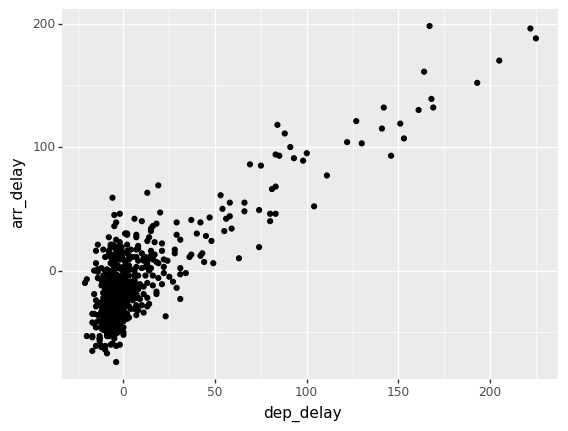

<ggplot: (678829999)>

In [25]:
# Scatterplot em GGPLOT
(
    ggplot(df_alaska, aes(x='dep_delay', y='arr_delay'))
    + geom_point()
)

---

## Learning Check 2.6
Create a new scatterplot using different variables in the alaska_flights data frame by modifying the example given.

/opt/homebrew/anaconda3/envs/deeplearning/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


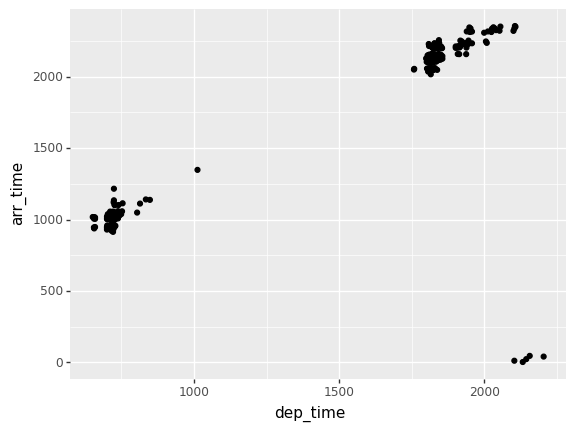

<ggplot: (678486450)>

In [26]:
# Scatterplot em GGPLOT
(
    ggplot(df_alaska, aes(x='dep_time', y='arr_time'))
    + geom_point()
)

---

## Learning Check 2.8
After viewing Figure 2.4, give an approximate range of arrival delays and departure delays that occur most frequently. How has that region changed compared to when you observed the same plot without alpha = 0.2 set in Figure 2.2?

**Resp**
Na Figura 2.4, a maioria dos atrasos de partida (dep_time) está concentrada entre aproximadamente -30 e 10 minutos, enquanto os atrasos de chegada estão majoritariamente entre -50 e 10 minutos. Sem a transparência introduzida pelo parâmetro alpha, como visto na Figura 2.2, a região de concentração parece maior, pois não é possível observar a sobreposição dos pontos.

---


## Learning Check 2.13
Plot a time series of a variable other than temp for Newark Airport in the first 15 days of January 2013.

In [27]:
# Faz o casting de time_hour para datetime
df_weather['time_hour'] = pd.to_datetime(df_weather['time_hour'])

df_weather.head()


,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,1,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01 01:00:00
1,2,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01 02:00:00
2,3,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01 03:00:00
3,4,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01 04:00:00
4,5,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01 05:00:00


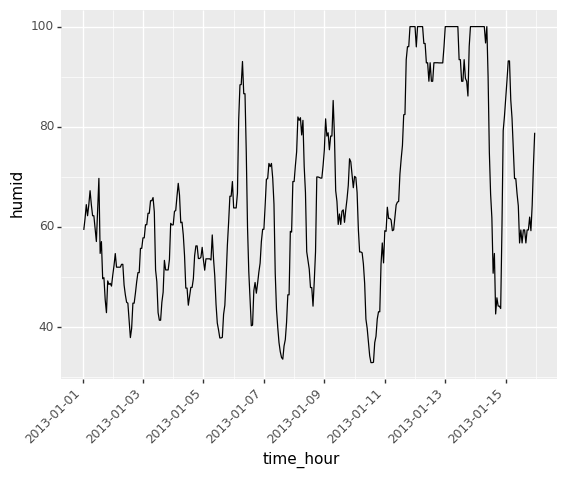

<ggplot: (679240424)>

In [28]:
# filtra o df_weather para mostrar apenas os dados entre Jan 1 e 15
df_weather_reduced = df_weather[(df_weather['time_hour'] >= '2013-01-01') & (df_weather['time_hour'] <= '2013-01-16')]


# Plota a umidade do ar ao longo do tempo
(
    ggplot(df_weather_reduced, aes(x='time_hour', y='humid')) 
    + geom_line()
    + theme(axis_text_x=element_text(angle=45, hjust=1))
)


---

## Learning Check 2.13
What does changing the number of bins from 30 to 40 tell us about the distribution of temperatures?

**RESP:**
O histograma com 30 bins da a impressão de uma certa homogeneidade nas barras da região central do histograma. Aumetar para 40 bins implica num aumento de "resolução" do histograma. Com isso foi possível observar a presença de algumas regiões pontuais de pico. No histograma de 30 bins, parecem existir apenas 2 picos bem suavizados, enquanto que no de 40, nota-se a presença de 6.

----

## Learning Check 2.18
What other things do you notice about this faceted plot? How does a faceted plot help us see relationships between two variables?

**RESP:**
Uma observação que trago desta visualização é que o mês 1 (janeiro) tende a ter as temperaturas mais baixas do ano. Isso faz sentido pois se trata de dados do hemisfério norte, em que janeiro coincide com o inverno.

Um grande benefício da visualização de gráficos facetados se dá pelo fato de que eles permitem a visualização de múltiplos subgráficos ao mesmo tempo, facilitando a comparação da influência de variáveis categóricas no contexto geral. Aqui neste caso, os meses podem ser interpretados como variávies categórias, apesar de terem uma certa relação de ordinalidade. Essa visualização simultânea evita que o leitor precise ficar navegando entre diferentes gráficos e esqueça de alguma informação.

----

## Learning Check 2.20
For which types of datasets would faceted plots not work well in comparing relationships between variables? Give an example describing the nature of these variables and other important characteristics.

**RESP:**
Gráficos facetados podem não ser úteis em datasets que possuem muitas categorias dentro de um campo. Por exemplo, para avaliar a distribuição de um dado levando em conta uma variável categórica de 100 níveis, serão gerados 100 gráficos diferentes. Isso sobrecarregaria a visualização e muito provavelmente a cognição humana não seria eficiente em extrair informações de um ambiente como esse.

----

## Learning Check 2.22
What does the dot at the bottom of the plot for May correspond to? Explain what might have occurred in May to produce this point.

**RESP:**
O ponto no fundo do gráfico corresponde ao ponto que está abaixo do bigode do boxplot, ou seja, uma região inferior ao Q1 - 1.5 IQR (Q1 -> quartil 1 e IQR -> amplitude interquartil). Este ponto pode ser considerado como um outlier levando em coinsideração esta métrica utilizada para definir a região dos bigodes do boxplot. 

Para o caso de Maio em específico, existem duas possibilidades plausíveis. A primeira seria um erro de medição de temperatura, e a segunda seria a chegada de uma frente fria anormal, que apesar de rara, pode acontecer.

----

## Learning Check 2.27
What is the difference between histograms and barplots?

**RESP:**
Histogramas são utilizados para a representação da distribuição de variáveis contínuas, enquanto que barplots são utilizados para a realização de comparações entre categorias distintas. Isso é evidente ao se observar o eixo x destes dois tipos de gráfico.

----

## Learning Check 2.30
Why should pie charts be avoided and replaced by barplots?

**RESP:**
Piecharts utilizam ângulos para representar informações. O grande problema disso é que a cognição humana não é boa em comparar ângulos. Já os barplots, apresentam as mesmas informações que os piecharts mas de uma maneira vertical, fazendop com que humanos consigam realizar comparações mais facilmente. 

----

## Learning Check 2.31
Why do you think people continue to use pie charts?

**RESP:**
Eu acredito que piecharts ainda são bastante utilizados hoje em dia porque eles são esteticamente agradáveis. Um piechart com muitas porções é mais agradável de se ver que um barchar com muitas barras, apesar de não transmitir uma informação tão clara. Possivelmente essa preferência estética se dá pelo fato de que o piechart compila todas as informações numa área relativamente pequena - um círculo. Um barchart com muitas barras pode trazer uma impressão de poluição e a necessidade de ocupar uma posição horizontal maior.

----

## Learning Check 2.36
Why is the faceted barplot preferred to the side-by-side and stacked barplots in this case?

**RESP:**

O barplot facetado reduz a sobrecarga de informações dentro do mesmo gráfico, se comparado com as opcões "side-by-side" e "stacked". Além disso, no contexto dos dados apresentados, a comparação de frequências de vôos de diferentes companhias aéreas na mesma origem, é importante. A visualização facetada facilita isso pois separa origens diferentes em outros gráficos, evitando sobrecarga visual.

----